In [2]:
from nilearn import image, datasets, input_data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

C:\Users\billah\AppData\Local\Temp\ipykernel_46000\3353222354.py:1: DeprecationWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  from nilearn import image, datasets, input_data


In [10]:
#List of the subjects' numbers
# subject_numbers = [3,5,6,7,8]
subject_numbers = [3, 5, 6, 7]


fmri_file_paths= {}
for i in subject_numbers:
    fmri_file_paths[f'fmri_file_paths_0{i}'] = [
        rf"D:\ds000228\BIDS\derivatives\sub-{i:02d}\func\sub-{i:02d}_task-risk1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz", rf"D:\ds000228\BIDS\derivatives\sub-{i:02d}\func\sub-{i:02d}_task-risk2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz"
    ]
    # fmri_file_paths[f'fmri_file_paths_0{i}']= [f'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/derivatives/sub-0{i}/func/sub-0{i}_task-carrsq_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', f'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/derivatives/sub-0{i}/func/sub-0{i}_task-carrsq_run-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']
fmri_file_paths

{'fmri_file_paths_03': ['D:\\ds000228\\BIDS\\derivatives\\sub-03\\func\\sub-03_task-risk1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz',
  'D:\\ds000228\\BIDS\\derivatives\\sub-03\\func\\sub-03_task-risk2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'],
 'fmri_file_paths_05': ['D:\\ds000228\\BIDS\\derivatives\\sub-05\\func\\sub-05_task-risk1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz',
  'D:\\ds000228\\BIDS\\derivatives\\sub-05\\func\\sub-05_task-risk2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'],
 'fmri_file_paths_06': ['D:\\ds000228\\BIDS\\derivatives\\sub-06\\func\\sub-06_task-risk1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz',
  'D:\\ds000228\\BIDS\\derivatives\\sub-06\\func\\sub-06_task-risk2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'],
 'fmri_file_paths_07': ['D:\\ds000228\\BIDS\\derivatives\\sub-07\\func\\sub-07_task-risk1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz',
  'D:\\ds000228\\BID

In [11]:
#Loading of fsaverage probmaps

import nibabel as nib
import numpy as np

# fsaverage probmaps file paths
# lh_fsaverage_path = 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/lh.nsdgeneral.mgz'
# rh_fsaverage_path = 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/rh.nsdgeneral.mgz'
lh_fsaverage_path = r'D:\Lucas\code\Fmriprep\lh.nsdgeneral.mgz'
rh_fsaverage_path = r'D:\Lucas\code\Fmriprep\rh.nsdgeneral.mgz'

# Load fsaverage probmaps
lh_fsaverage_img = nib.load(lh_fsaverage_path)
rh_fsaverage_img = nib.load(rh_fsaverage_path)

# Get data from probmaps
lh_fsaverage_data = lh_fsaverage_img.get_fdata()
rh_fsaverage_data = rh_fsaverage_img.get_fdata()

# Show fsaverage probmap statistics
print("Statistiques de lh_fsaverage_data :", np.min(lh_fsaverage_data), np.max(lh_fsaverage_data), np.mean(lh_fsaverage_data))
print("Statistiques de rh_fsaverage_data :", np.min(rh_fsaverage_data), np.max(rh_fsaverage_data), np.mean(rh_fsaverage_data))
print("Dimensions des probmaps gauche fsaverage :", lh_fsaverage_data.shape)
print("Dimensions des probmaps droite fsaverage :", rh_fsaverage_data.shape)

Statistiques de lh_fsaverage_data : 109.4867935180664 2937.3193359375 1211.3985910816382
Statistiques de rh_fsaverage_data : 17.374588012695312 3152.876953125 1070.6692550517482
Dimensions des probmaps gauche fsaverage : (163842, 1, 1, 168)
Dimensions des probmaps droite fsaverage : (163842, 1, 1, 168)


First method : use converted fsaverage probmaps to volume (using freesurfer on ubuntu, with WSL) , but it doesn't work!

In [4]:
# Try to use converted fsaverage probmaps to volume, but conversion doesn't work
import nibabel as nib
import numpy as np
from nilearn.image import resample_to_img

# Chemins des fichiers
fmri_path = 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/derivatives/sub-03/func/sub-03_task-carrsq_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
lh_roi_path = 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/lh.nsdgeneral_mni.nii.gz'
rh_roi_path = 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/rh.nsdgeneral_mni.nii.gz'
output_path = 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/extracted_voxels.nii.gz'

# Charger les données fMRI
fmri_img = nib.load(fmri_path)
fmri_data = fmri_img.get_fdata()

# Charger les probmaps dans l'espace MNI
lh_roi_img = nib.load(lh_roi_path)
rh_roi_img = nib.load(rh_roi_path)

print("Statistiques de lh_roi_data avant rééchantillonnage :", np.min(nib.load(lh_roi_path).get_fdata()), np.max(nib.load(lh_roi_path).get_fdata()), np.mean(nib.load(lh_roi_path).get_fdata()))
print("Statistiques de rh_roi_data avant rééchantillonnage :", np.min(nib.load(rh_roi_path).get_fdata()), np.max(nib.load(rh_roi_path).get_fdata()), np.mean(nib.load(rh_roi_path).get_fdata()))


# Rééchantillonner les probmaps pour qu'elles correspondent aux dimensions des données fMRI
lh_roi_resampled = resample_to_img(lh_roi_img, fmri_img, interpolation='nearest')
rh_roi_resampled = resample_to_img(rh_roi_img, fmri_img, interpolation='nearest')

lh_roi_data = lh_roi_resampled.get_fdata()
rh_roi_data = rh_roi_resampled.get_fdata()

# Vérifier les dimensions des probmaps et des données fMRI après rééchantillonnage
print("Dimensions des données fMRI :", fmri_data.shape)
print("Dimensions des probmaps gauche après rééchantillonnage :", lh_roi_data.shape)
print("Dimensions des probmaps droite après rééchantillonnage :", rh_roi_data.shape)

# Afficher quelques statistiques des probmaps
print("Statistiques de lh_roi_data :", np.min(lh_roi_data), np.max(lh_roi_data), np.mean(lh_roi_data))
print("Statistiques de rh_roi_data :", np.min(rh_roi_data), np.max(rh_roi_data), np.mean(rh_roi_data))

# Fusionner les probmaps gauche et droite
roi_data = np.maximum(lh_roi_data, rh_roi_data)

# Appliquer un seuil pour binariser la probmap (par exemple, 0.2)
roi_mask = roi_data > 0.2

# Vérifier le nombre de voxels sélectionnés
print("Nombre de voxels dans le masque ROI :", np.sum(roi_mask))

# Extraire les voxels d'intérêt
extracted_voxels = fmri_data[roi_mask]

# Afficher les dimensions des données fMRI extraites
print("Dimensions des données fMRI extraites :", extracted_voxels.shape)

# Sauvegarder les voxels extraits dans un nouveau fichier NIfTI (optionnel)
affine = fmri_img.affine
extracted_img = nib.Nifti1Image(extracted_voxels.reshape(-1, 1, 1, fmri_data.shape[-1]), affine)
nib.save(extracted_img, output_path)

print(f"Extraction terminée. Les voxels d'intérêt sont sauvegardés dans '{output_path}'.")




FileNotFoundError: No such file or no access: 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/derivatives/sub-03/func/sub-03_task-carrsq_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'

Final method: create a probmap using volume ROIs of nsdgenral dataset, convert it to the MNI space and apply the mask to our subjects

In [12]:
#Voxel size, to choose whether to use ROIs in func1mm or func1.8mm
import nibabel as nib
# fmri_path_preproc = 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/derivatives/sub-03/func/sub-03_task-carrsq_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
# fmri_path_preproc = r"C:\Users\Rémi\Desktop\CentraleSupelec\Cours\stage\australie\ds000228\derivatives\sub-pixar001\func\sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz"
# fmri_path_raw = r"G:\fMRI FINAL FOLDER\BOLD_DATA\BIDS\sub-03\func\files_AP_MB4_BOLD_Risk2_20230814084543_13.nii.gz"
# fmri_path_raw = 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/sub-03/func/sub-03_task-carrsq_run-1_bold.nii.gz'

for fmri_path_preproc in fmri_file_paths.values():
    fmri_img = nib.load(fmri_path_preproc[0])
    voxel_dims = fmri_img.header.get_zooms()

    print(f"Dimensions des voxels des données fMRI : {voxel_dims}")

# We'll use func1.8mm because it's closer to our voxel's dimensions

Dimensions des voxels des données fMRI : (np.float32(2.0), np.float32(2.0), np.float32(2.0), np.float32(1.0))
Dimensions des voxels des données fMRI : (np.float32(2.0), np.float32(2.0), np.float32(2.0), np.float32(1.0))
Dimensions des voxels des données fMRI : (np.float32(2.0), np.float32(2.0), np.float32(2.0), np.float32(1.0))
Dimensions des voxels des données fMRI : (np.float32(2.0), np.float32(2.0), np.float32(2.0), np.float32(1.0))


In [13]:
# Step 1: resample and filter in order to get the same size for every ROIs and only >0 values
import nibabel as nib
import numpy as np
import os
from nilearn.image import resample_img

# List of ROI files for different topics
# roi_files = [
#     'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/func1pt8mm/nsdgeneral (1).nii.gz',
#     'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/func1pt8mm/nsdgeneral (2).nii.gz',
#     'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/func1pt8mm/nsdgeneral (3).nii.gz',
#     'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/func1pt8mm/nsdgeneral (4).nii.gz',
#     'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/func1pt8mm/nsdgeneral (5).nii.gz',
#     'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/func1pt8mm/nsdgeneral (6).nii.gz',
#     'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/func1pt8mm/nsdgeneral (7).nii.gz',
#     'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/func1pt8mm/nsdgeneral (8).nii.gz',
# ]

roi_files = [
    r"E:\fMRI_FINAL_FOLDER\BOLD_DATA\nsdgeneralROI\func1pt8mm\nsdgeneral (1).nii.gz",
    r"E:\fMRI_FINAL_FOLDER\BOLD_DATA\nsdgeneralROI\func1pt8mm\nsdgeneral (2).nii.gz",
    r"E:\fMRI_FINAL_FOLDER\BOLD_DATA\nsdgeneralROI\func1pt8mm\nsdgeneral (3).nii.gz",
    r"E:\fMRI_FINAL_FOLDER\BOLD_DATA\nsdgeneralROI\func1pt8mm\nsdgeneral (4).nii.gz",
    r"E:\fMRI_FINAL_FOLDER\BOLD_DATA\nsdgeneralROI\func1pt8mm\nsdgeneral (5).nii.gz",
    r"E:\fMRI_FINAL_FOLDER\BOLD_DATA\nsdgeneralROI\func1pt8mm\nsdgeneral (6).nii.gz",
    r"E:\fMRI_FINAL_FOLDER\BOLD_DATA\nsdgeneralROI\func1pt8mm\nsdgeneral (7).nii.gz",
    r"E:\fMRI_FINAL_FOLDER\BOLD_DATA\nsdgeneralROI\func1pt8mm\nsdgeneral (8).nii.gz",
]

def resample_and_filter_image(image, target_shape, target_affine):
    resampled_img = resample_img(image, target_shape=target_shape, target_affine=target_affine, interpolation='nearest')
    resampled_data = resampled_img.get_fdata()
    # Filter to keep only positive values
    filtered_data = resampled_data > 0
    return nib.Nifti1Image(filtered_data.astype(np.float32), resampled_img.affine)


# Load the first ROI image to get the target shape and affine
first_roi = nib.load(roi_files[0])
target_shape = first_roi.shape
target_affine = first_roi.affine

filtered_resampled_rois = []
for roi_file in roi_files:
    roi_img = nib.load(roi_file)
    filtered_resampled_roi = resample_and_filter_image(roi_img, target_shape, target_affine)
    filtered_resampled_rois.append(filtered_resampled_roi)


C:\Users\billah\AppData\Local\Temp\ipykernel_46000\3707189225.py:31: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  resampled_img = resample_img(image, target_shape=target_shape, target_affine=target_affine, interpolation='nearest')
C:\Users\billah\AppData\Local\Temp\ipykernel_46000\3707189225.py:31: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_img = resample_img(image, target_shape=target_shape, target_affine=target_affine, interpolation='nearest')
C:\Users\billah\AppData\Local\Temp\ipykernel_46000\3707189225.py:31: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  resampled_img = resa

In [14]:
#Step 2: Create the probmap from the resampled images
# Initialize the probmap with zeros
probmap_data = np.zeros(target_shape)

# Add the ROIs of the different subjects to create the probmap
for resampled_roi in filtered_resampled_rois:
    roi_data = resampled_roi.get_fdata()
    probmap_data += roi_data

# Normalize the probmap to obtain values ​​between 0 and 1
probmap_data /= len(roi_files)

# Save the probmap in volume
probmap_img = nib.Nifti1Image(probmap_data, target_affine)
probmap_path = r'D:\nsdgeneral_probmap_1pt8mm.nii.gz'
nib.save(probmap_img, probmap_path)

print(f'Probmap créée et sauvegardée à: {probmap_path}')


Probmap créée et sauvegardée à: D:\nsdgeneral_probmap_1pt8mm.nii.gz


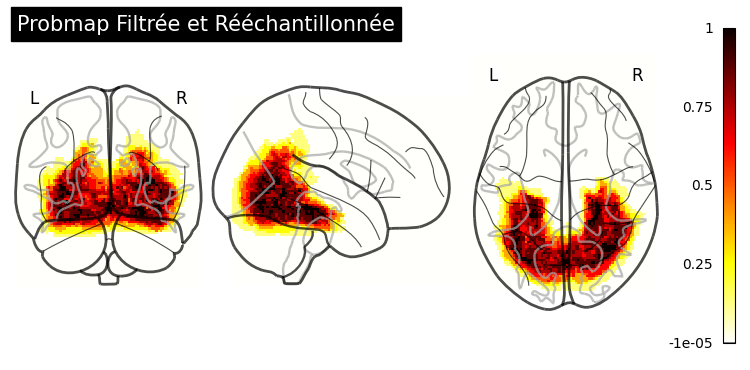

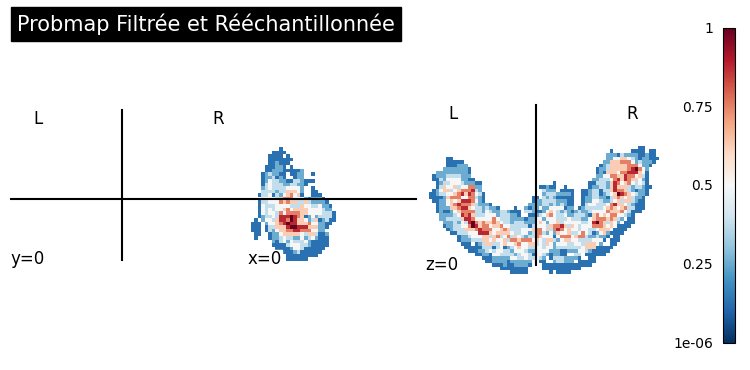

In [15]:
#Visualize the probmap:
from nilearn import plotting

# Charger la probmap créée
probmap_img = nib.load(probmap_path)

# Visualiser la probmap sans seuil
plotting.plot_glass_brain(probmap_img, display_mode='ortho', colorbar=True, title='Probmap Filtrée et Rééchantillonnée')
plotting.show()

# Afficher les coupes de la probmap sans seuil
plotting.plot_stat_map(probmap_img, bg_img=None, display_mode='ortho', cut_coords=(0, 0, 0), title='Probmap Filtrée et Rééchantillonnée')
plotting.show()

In [16]:
# Check the dimensions of our FMRI data
def display_fmri_dimensions(fmri_file_paths):
    for subject, file_paths in fmri_file_paths.items():
        print(f"Dimensions des fichiers fMRI pour {subject} :")
        for fmri_file in file_paths:
            fmri_img = nib.load(fmri_file)
            fmri_data = fmri_img.get_fdata()
            dimensions = fmri_data.shape
            voxel_dims = fmri_img.header.get_zooms()
            print(f"{fmri_file} : Dimensions = {dimensions}, Dimensions des voxels = {voxel_dims}")
        print()

# Afficher les dimensions des fichiers fMRI
display_fmri_dimensions(fmri_file_paths)

Dimensions des fichiers fMRI pour fmri_file_paths_03 :
D:\ds000228\BIDS\derivatives\sub-03\func\sub-03_task-risk1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz : Dimensions = (97, 115, 97, 800), Dimensions des voxels = (np.float32(2.0), np.float32(2.0), np.float32(2.0), np.float32(1.0))
D:\ds000228\BIDS\derivatives\sub-03\func\sub-03_task-risk2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz : Dimensions = (97, 115, 97, 770), Dimensions des voxels = (np.float32(2.0), np.float32(2.0), np.float32(2.0), np.float32(1.0))

Dimensions des fichiers fMRI pour fmri_file_paths_05 :
D:\ds000228\BIDS\derivatives\sub-05\func\sub-05_task-risk1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz : Dimensions = (97, 115, 97, 799), Dimensions des voxels = (np.float32(2.0), np.float32(2.0), np.float32(2.0), np.float32(1.0))
D:\ds000228\BIDS\derivatives\sub-05\func\sub-05_task-risk2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz : Dimensions = (97, 115, 97, 758), Dimens

In [17]:
# Step 3: Resample the probmap into MNI space
from nilearn.image import resample_to_img

# Charger la probmap créée
probmap_img = nib.load(probmap_path)

# Charger le fichier fMRI pré-traité dans l'espace MNI
# fmri_mni_path = 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/derivatives/sub-03/func/sub-03_task-carrsq_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
# fmri_mni_path = r"C:\Users\Rémi\Desktop\CentraleSupelec\Cours\stage\australie\ds000228\derivatives\sub-pixar001\func\sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz"
i = 1
for fmri_mni_path in fmri_file_paths.values():
    i+=1
    fmri_mni_img = nib.load(fmri_mni_path[0])

    # Rééchantillonner la probmap pour qu'elle corresponde aux dimensions du fMRI MNI
    probmap_resampled_img = resample_to_img(probmap_img, fmri_mni_img, interpolation='nearest')
    # probmap_resampled_path = 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/nsdgeneral_probmap_resampled.nii.gz'
    probmap_resampled_path = rf'D:\fMRI_FINAL_FOLDER\nsdgeneral_probmap_resampled{i}.nii.gz'

    nib.save(probmap_resampled_img, probmap_resampled_path)

    print(f'Probmap rééchantillonnée et sauvegardée à: {probmap_resampled_path}')

C:\Users\billah\AppData\Local\Temp\ipykernel_46000\2663889217.py:16: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  probmap_resampled_img = resample_to_img(probmap_img, fmri_mni_img, interpolation='nearest')
C:\Users\billah\AppData\Local\Temp\ipykernel_46000\2663889217.py:16: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  probmap_resampled_img = resample_to_img(probmap_img, fmri_mni_img, interpolation='nearest')
C:\Users\billah\AppData\Local\Temp\ipykernel_46000\2663889217.py:16: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  probmap_resampled_img = resample_to_img(probmap_img, fmri_mni_img, int

Probmap rééchantillonnée et sauvegardée à: D:\fMRI_FINAL_FOLDER\nsdgeneral_probmap_resampled2.nii.gz


C:\Users\billah\AppData\Local\Temp\ipykernel_46000\2663889217.py:16: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  probmap_resampled_img = resample_to_img(probmap_img, fmri_mni_img, interpolation='nearest')
C:\Users\billah\AppData\Local\Temp\ipykernel_46000\2663889217.py:16: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  probmap_resampled_img = resample_to_img(probmap_img, fmri_mni_img, interpolation='nearest')


Probmap rééchantillonnée et sauvegardée à: D:\fMRI_FINAL_FOLDER\nsdgeneral_probmap_resampled3.nii.gz


C:\Users\billah\AppData\Local\Temp\ipykernel_46000\2663889217.py:16: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  probmap_resampled_img = resample_to_img(probmap_img, fmri_mni_img, interpolation='nearest')
C:\Users\billah\AppData\Local\Temp\ipykernel_46000\2663889217.py:16: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  probmap_resampled_img = resample_to_img(probmap_img, fmri_mni_img, interpolation='nearest')


Probmap rééchantillonnée et sauvegardée à: D:\fMRI_FINAL_FOLDER\nsdgeneral_probmap_resampled4.nii.gz
Probmap rééchantillonnée et sauvegardée à: D:\fMRI_FINAL_FOLDER\nsdgeneral_probmap_resampled5.nii.gz


C:\Users\billah\AppData\Local\Temp\ipykernel_46000\2663889217.py:16: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  probmap_resampled_img = resample_to_img(probmap_img, fmri_mni_img, interpolation='nearest')


In [18]:
#Statistics of the resampled probmap:
import numpy as np
import nibabel as nib

# Charger la probmap rééchantillonnée
# probmap_resampled_path = 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/nsdgeneral_probmap_resampled.nii.gz'
for i in subject_numbers:
    probmap_resampled_path = rf"D:\fMRI_FINAL_FOLDER\nsdgeneral_probmap_resampled{i}.nii.gz"
    probmap_resampled_img = nib.load(probmap_resampled_path)
    probmap_resampled_data = probmap_resampled_img.get_fdata()

# Afficher les statistiques de la probmap rééchantillonnée
print("Statistiques de la probmap rééchantillonnée :")
print(f"Min: {np.min(probmap_resampled_data)}")
print(f"Max: {np.max(probmap_resampled_data)}")
print(f"Moyenne: {np.mean(probmap_resampled_data)}")
print(f"Écart-type: {np.std(probmap_resampled_data)}")

Statistiques de la probmap rééchantillonnée :
Min: 0.0
Max: 1.0
Moyenne: 0.009785034680024214
Écart-type: 0.06829437075302523


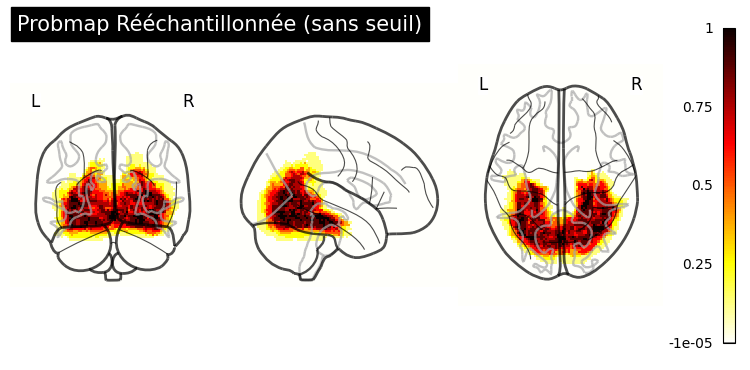

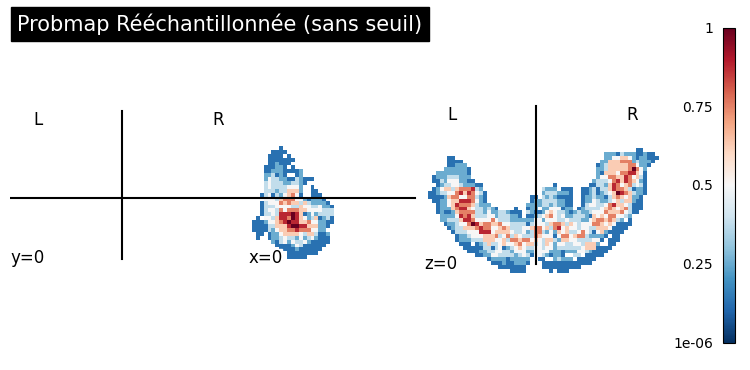

In [19]:
#Visualisation of the probmap without threshold:
from nilearn import plotting

# Visualiser la probmap sans seuil
plotting.plot_glass_brain(probmap_resampled_img, display_mode='ortho', colorbar=True, title='Probmap Rééchantillonnée (sans seuil)')
plotting.show()

# Afficher les coupes de la probmap sans seuil
plotting.plot_stat_map(probmap_resampled_img, bg_img=None, display_mode='ortho', cut_coords=(0, 0, 0), title='Probmap Rééchantillonnée (sans seuil)')
plotting.show()

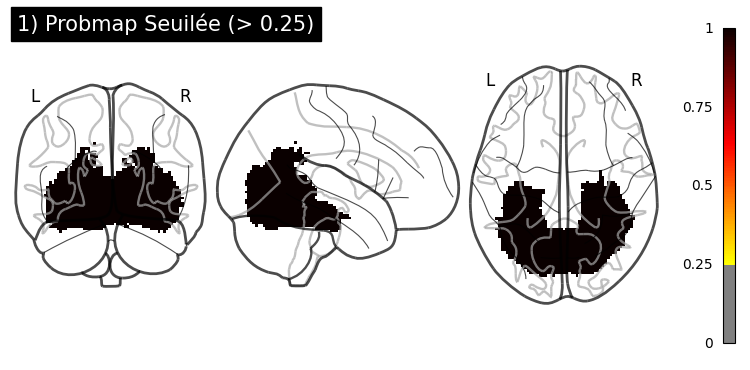

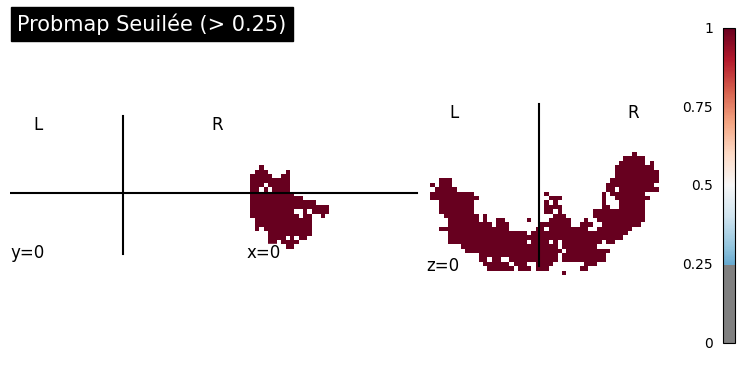

In [20]:
#Visualisation of the resampled probmap with a threshold of 0.25:
import nibabel as nib
import numpy as np
from nilearn import plotting

for i in subject_numbers:
    # Chemin de la probmap rééchantillonnée
    probmap_resampled_path = rf"D:\fMRI_FINAL_FOLDER\nsdgeneral_probmap_resampled{i}.nii.gz"

    # Charger la probmap rééchantillonnée
    probmap_resampled_img = nib.load(probmap_resampled_path)
    probmap_resampled_data = probmap_resampled_img.get_fdata()

    # Appliquer un seuil pour binariser la probmap (par exemple, 0.25)
    roi_mask = probmap_resampled_data > 0.25

    # Créer une nouvelle image NIfTI pour la probmap seuilée
    roi_img = nib.Nifti1Image(roi_mask.astype(np.float32), probmap_resampled_img.affine)

# Afficher la probmap seuilée avec nilearn
plotting.plot_glass_brain(roi_img, threshold=0.25, display_mode='ortho', colorbar=True, title='1) Probmap Seuilée (> 0.25)')
plotting.show()

# Afficher les coupes de la probmap seuilée
plotting.plot_stat_map(roi_img, bg_img=None, threshold=0.25, display_mode='ortho', cut_coords=(0, 0, 0), title='Probmap Seuilée (> 0.25)')
plotting.show()


In [21]:
#Step 4: Apply resampled probmap to multiple fMRI files

import nibabel as nib
import numpy as np
from nilearn.image import resample_to_img

# Path of the resampled probmap
# probmap_resampled_path = 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/nsdgeneral_probmap_resampled.nii.gz'
probmap_resampled_path = r"E:\fMRI_FINAL_FOLDER\BOLD_DATA\nsdgeneralROI\func1pt8mm\nsdgeneral_probmap_resampled.nii.gz"

# Load resampled probmap
probmap_resampled_img = nib.load(probmap_resampled_path)
probmap_resampled_data = probmap_resampled_img.get_fdata()


# Function to apply the probmap to an fMRI file
def apply_probmap(fmri_file, probmap_data, output_dir):
    # Charger les données fMRI
    fmri_img = nib.load(fmri_file)
    fmri_data = fmri_img.get_fdata()
    
    # Apply a threshold to binarize the probmap (for example, 0.125)
    roi_mask = probmap_data > 0.125

    # Extract voxels of interest
    extracted_voxels = fmri_data[roi_mask]

    # Show dimensions of extracted fMRI data
    print(f"Dimensions des données fMRI extraites pour {fmri_file}: {extracted_voxels.shape}")

    # Save the extracted voxels in a new NIfTI file (optional)
    affine = fmri_img.affine
    extracted_img = nib.Nifti1Image(extracted_voxels.reshape(-1, 1, 1, fmri_data.shape[-1]), affine)
    
    # Build exit path
    output_path = os.path.join(output_dir, os.path.basename(fmri_file).replace('.nii.gz', '_extracted.nii.gz'))
    nib.save(extracted_img, output_path)

    print(f"Voxels extraits sauvegardés à: {output_path}")

# Apply the resampled probmap to each fMRI file
# output_dir = 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/nsdgeneralROI/extracted_voxels'
output_dir = rf"E:\fMRI_FINAL_FOLDER\BOLD_DATA\nsdgeneralROI\extracted_voxels{i}"


for subject, files in fmri_file_paths.items():
    for fmri_file in files:
        probmap_resampled_path = rf"D:\fMRI_FINAL_FOLDER\nsdgeneral_probmap_resampled{i}.nii.gz"
        # Load resampled probmap
        probmap_resampled_img = nib.load(probmap_resampled_path)
        probmap_resampled_data = probmap_resampled_img.get_fdata()
        output_dir = rf"D:\fMRI_FINAL_FOLDER\BOLD_DATA_2"
        apply_probmap(fmri_file, probmap_resampled_data, output_dir)


Dimensions des données fMRI extraites pour D:\ds000228\BIDS\derivatives\sub-03\func\sub-03_task-risk1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz: (20413, 800)
Voxels extraits sauvegardés à: D:\fMRI_FINAL_FOLDER\BOLD_DATA_2\sub-03_task-risk1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_extracted.nii.gz
Dimensions des données fMRI extraites pour D:\ds000228\BIDS\derivatives\sub-03\func\sub-03_task-risk2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz: (20413, 770)
Voxels extraits sauvegardés à: D:\fMRI_FINAL_FOLDER\BOLD_DATA_2\sub-03_task-risk2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_extracted.nii.gz
Dimensions des données fMRI extraites pour D:\ds000228\BIDS\derivatives\sub-05\func\sub-05_task-risk1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz: (20413, 799)
Voxels extraits sauvegardés à: D:\fMRI_FINAL_FOLDER\BOLD_DATA_2\sub-05_task-risk1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_extracted.nii.gz
Dimensions des données fMRI extrai